# Preprocessing

## Importing Modules

In [1]:
pip install dtreeviz

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,OneHotEncoder,LabelEncoder
from sklearn.svm import SVR
import seaborn as sns
from imblearn.over_sampling import RandomOverSampler

/usr/local/lib/python3.7/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)


## Importing Dataset

In [3]:
df=pd.read_csv('WA_Fn-UseC_-HR-Employee-Attrition.csv')
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

## Missing Values

In [5]:
df.isna().any().any()

False

## Encoding String Values

In [6]:
#Columns with string values
categorical_column = ['Attrition', 'BusinessTravel', 'Department', 'Gender', 'JobRole', 'MaritalStatus', 'OverTime','EducationField']
encoder=LabelEncoder()
df[categorical_column]=df[categorical_column].apply(encoder.fit_transform)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   int64 
 2   BusinessTravel            1470 non-null   int64 
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   int64 
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   int64 
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   int64 
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

## Separating Features from Output

In [8]:
Y=df['Attrition']
X=df.drop(['EmployeeCount','Attrition','EmployeeNumber','Over18','StandardHours'],axis=1)

In [9]:
ros = RandomOverSampler(random_state=42)
X_, Y = ros.fit_resample(X,Y)
X = pd.DataFrame(X_,columns=X.columns)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


## Train-Test-Split

In [10]:
X_train,X_test,y_train,y_test=train_test_split(X,Y,test_size=0.2,random_state=4)

# Decision Tree

### Import Modules

In [11]:
import graphviz
from subprocess import check_call
from IPython.display import Image
from dtreeviz.trees import dtreeviz
from sklearn.model_selection import train_test_split, GridSearchCV, cross_validate
from sklearn.tree import DecisionTreeClassifier, export_graphviz, export_text, plot_tree, _tree
from sklearn.metrics import make_scorer, accuracy_score, f1_score, precision_score, recall_score, roc_auc_score, confusion_matrix, log_loss
import matplotlib.font_manager

## Decision Tree Classifier

Function to Visualize Decision Tree Model

In [12]:
def decision_tree_maker(X_train, Y_train, X_test, Y_test, my_depth = 5):

  # train model
  dt = DecisionTreeClassifier(random_state = 0, max_depth = my_depth, criterion='entropy')
  dt.fit(X_train, Y_train)

  # test model 
  Y_pred = dt.predict(X_test)
  # metric evaluation
  dt_accuracy = accuracy_score(Y_test, Y_pred)
  print('Acuuracy = ', dt_accuracy)
  dt_f1 = f1_score(Y_test, Y_pred)
  print('F1 Score = ', dt_f1)
  dt_precision = precision_score(Y_test, Y_pred)
  print('Precision = ', dt_precision)
  dt_recall = recall_score(Y_test, Y_pred)
  print('Recall = ', dt_recall)
  dt_confusion_matrix = confusion_matrix(Y_test, Y_pred)
  print('Confusion Matrix:\n', dt_confusion_matrix)

  features = ['Age', 'BusinessTravel', 'DailyRate', 'Department', 'DistanceFromHome', 'Education', 'EducationField', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobInvolvement', 'JobLevel', 'JobRole',  'JobSatisfaction', 'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',  'RelationshipSatisfaction', 'StockOptionLevel', 'TotalWorkingYears',  'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager']
  classes = ['No', 'Yes']

  # text representation of decision tree
  text_representation = export_text(dt, feature_names=features)
  print('------------ Text Representation of Decision Tree ----------')
  print(text_representation)

  np.warnings.filterwarnings('ignore', category=np.VisibleDeprecationWarning)
  # graphical represenation of decision tree, save to file 'decision_tree.png'
  dot_data = export_graphviz(dt, out_file ='tree.dot', feature_names=features, class_names=classes)
  check_call(['dot','-Tpng','tree.dot','-o','decision_tree.png'])

  # decision tree detailed visualisation
  viz = dtreeviz(dt, X_train, Y_train, target_name="Attrition Rate",feature_names=features, class_names=classes)
  return viz

### Train and Test Decision Tree Model

Acuuracy =  0.7469635627530364
F1 Score =  0.7228381374722838
Precision =  0.7874396135265701
Recall =  0.6680327868852459
Confusion Matrix:
 [[206  44]
 [ 81 163]]
------------ Text Representation of Decision Tree ----------
|--- OverTime <= 0.50
|   |--- TotalWorkingYears <= 2.50
|   |   |--- Age <= 32.50
|   |   |   |--- RelationshipSatisfaction <= 3.50
|   |   |   |   |--- class: 1
|   |   |   |--- RelationshipSatisfaction >  3.50
|   |   |   |   |--- class: 0
|   |   |--- Age >  32.50
|   |   |   |--- Department <= 0.50
|   |   |   |   |--- class: 1
|   |   |   |--- Department >  0.50
|   |   |   |   |--- class: 0
|   |--- TotalWorkingYears >  2.50
|   |   |--- StockOptionLevel <= 0.50
|   |   |   |--- JobSatisfaction <= 1.50
|   |   |   |   |--- class: 1
|   |   |   |--- JobSatisfaction >  1.50
|   |   |   |   |--- class: 0
|   |   |--- StockOptionLevel >  0.50
|   |   |   |--- YearsAtCompany <= 31.50
|   |   |   |   |--- class: 0
|   |   |   |--- YearsAtCompany >  31.50
|   |   

findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.


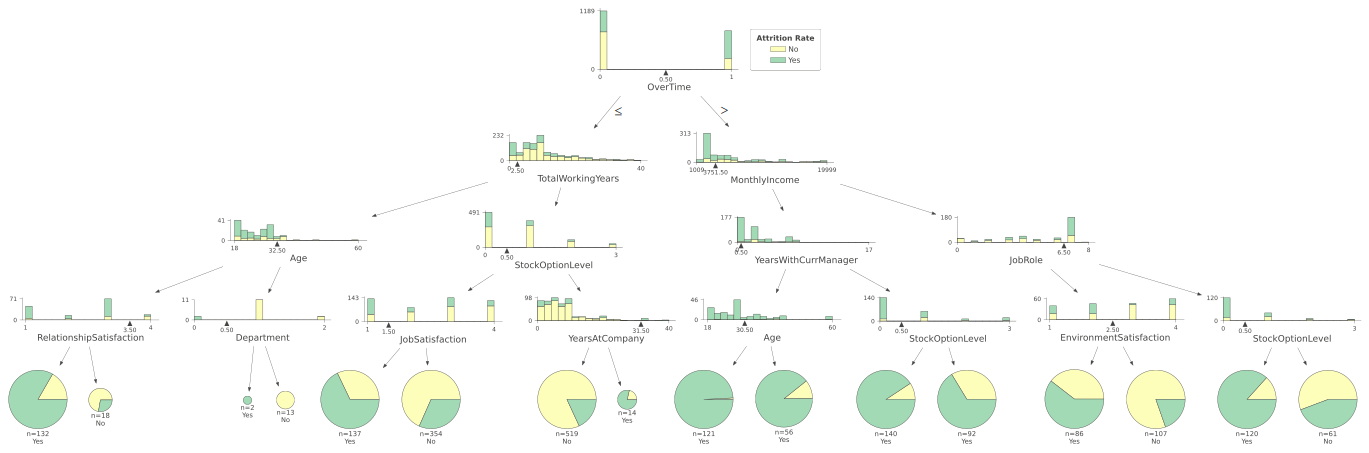

In [13]:
decision_tree_maker(X_train, y_train, X_test, y_test, 4)

Function for Feature Importance for Decision Trees

In [15]:
def get_feature_importance(dt, X_train):
  # feature importance
  # The importance of a feature is computed as the (normalized) total reduction of the criterion brought by that feature. It is also known as the Gini importance.
  for importance, name in sorted(zip(dt.feature_importances_, X_train.columns), reverse=True):
    print(name, importance)

  # plot
  plt.xticks(rotation='vertical')
  plt.bar(X_train.columns, dt.feature_importances_, align='edge', width=0.3)
  plt.xlabel("Features")
  plt.ylabel("Importance")
  plt.title("Feature Importance for the Decision tree")
  plt.show()

## Hyperparameter Tuning using GridSearch CV 

Analyzing Accuracy with Depth of Decision Tree

[]

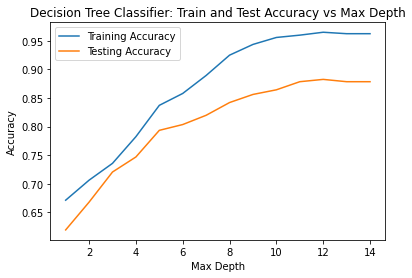

In [16]:
dt_train_accuracy = []
dt_test_accuracy = []

# do GridSearch CV over different values
for i in np.arange(1, 15):
  param_grid = {'criterion':['entropy','gini'],'max_depth': [i],'max_leaf_nodes':[5, 10, 20, 50, 100],'random_state':[0]}
  dt = GridSearchCV(DecisionTreeClassifier(random_state=0), param_grid, cv=5)
  dt.fit(X_train,y_train)
  y_train_pred = dt.predict(X_train)
  y_pred = dt.predict(X_test)
  s = accuracy_score(y_train, y_train_pred)
  dt_train_accuracy.append(s)
  dt_test_accuracy.append(accuracy_score(y_test, y_pred))

# plot graph
plt.title("Decision Tree Classifier: Train and Test Accuracy vs Max Depth")
plt.xlabel("Max Depth")
plt.ylabel("Accuracy")
plt.plot(np.arange(1,15), dt_train_accuracy, label="Training Accuracy")
plt.plot(np.arange(1,15), dt_test_accuracy, label="Testing Accuracy")
plt.legend()
plt.plot()

In [17]:
# print values at max depth = 4
print('Train Accuracy at max depth = 4 : ', dt_train_accuracy[3])
print('Train Accuracy at max depth = 4 : ', dt_test_accuracy[3])

Train Accuracy at max depth = 4 :  0.7824543610547667
Train Accuracy at max depth = 4 :  0.7469635627530364


Function for Grid Search CV

In [18]:
# performing GridSearchCV on data to get best model hyperparameters
def gcv(X_train, Y_train, X_test, Y_test):

  # make scorer
  scoring = make_scorer(accuracy_score)

  # define parameters
  max_depth = [int(x) for x in np.linspace(2, 15, num=10)] 
  # max_depth.append(None)

  # perform GridSearchCV with given parameters
  g_cv = GridSearchCV(estimator=DecisionTreeClassifier(random_state=0),
                param_grid={'criterion': ['gini', 'entropy'],
                            'max_depth': max_depth,
                            'max_features': ['auto', 'log2', 'sqrt', 0.33334],
                            'min_samples_leaf': [1, 2, 5, 10, 15, 20],
                            'min_samples_split': range(2, 10),
                            'max_leaf_nodes': [5, 10, 20, 50, 100],
                            'random_state': [0]},
                scoring=scoring, cv=5, refit=True)

  g_cv.fit(X_train, Y_train)

  # get best parameter values
  print(g_cv.best_params_)

  # train new model with best parameters
  dt_classifier = DecisionTreeClassifier(**g_cv.best_params_).fit(X_train, Y_train)
  Y_pred = dt_classifier.predict(X_test)
  dt_accuracy = accuracy_score(Y_test, Y_pred)
  print('Accuracy = ', dt_accuracy)
  dt_f1 = f1_score(Y_test, Y_pred)
  print('F1 Score = ', dt_f1)
  dt_precision = precision_score(Y_test, Y_pred)
  print('Precision = ', dt_precision)
  dt_recall = recall_score(Y_test, Y_pred)
  print('Recall = ', dt_recall)
  return dt_classifier, g_cv.best_params_, dt_accuracy

Run Grid Search CV

In [19]:
dt_classifier, best_params_raw, accuracy_cv = gcv(X_train, y_train, X_test, y_test)

{'criterion': 'gini', 'max_depth': 13, 'max_features': 0.33334, 'max_leaf_nodes': 100, 'min_samples_leaf': 1, 'min_samples_split': 5, 'random_state': 0}
Accuracy =  0.8846153846153846
F1 Score =  0.8905950095969289
Precision =  0.8375451263537906
Recall =  0.9508196721311475


### Visualizing Decision Tree Model 

Decision Tree Model with Best Parameters

In [20]:
# train new model with best parameters
dt_classifier = DecisionTreeClassifier(**best_params_raw).fit(X_train, y_train)
Y_pred = dt_classifier.predict(X_test)
dt_accuracy = accuracy_score(y_test, Y_pred)
print('Accuracy = ', dt_accuracy)
dt_f1 = f1_score(y_test, Y_pred)
print('F1 Score = ', dt_f1)
dt_precision = precision_score(y_test, Y_pred)
print('Precision = ', dt_precision)
dt_recall = recall_score(y_test, Y_pred)
print('Recall = ', dt_recall)
features = ['Age', 'BusinessTravel', 'DailyRate', 'Department', 'DistanceFromHome', 'Education', 'EducationField', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobInvolvement', 'JobLevel', 'JobRole',  'JobSatisfaction', 'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',  'RelationshipSatisfaction', 'StockOptionLevel', 'TotalWorkingYears',  'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager']
classes = ['No', 'Yes']
np.warnings.filterwarnings('ignore', category=np.VisibleDeprecationWarning)
dot_data = export_graphviz(dt_classifier, out_file ='tree_best.dot', feature_names=features, class_names=classes)
check_call(['dot','-Tpng','tree_best.dot','-o','decision_tree_best.png'])
dtreeviz(dt_classifier, X_train, y_train, target_name="Attrition Rate",feature_names=features, class_names=classes)

Output hidden; open in https://colab.research.google.com to view.

### Feature Importance

OverTime 0.12889906509456597
MonthlyIncome 0.12706884617073022
StockOptionLevel 0.05427909175779232
YearsAtCompany 0.053243995412498996
TotalWorkingYears 0.048711474880587156
Age 0.044004404617956426
JobSatisfaction 0.04110249438017794
MonthlyRate 0.041047310817462025
RelationshipSatisfaction 0.04104211198320807
PercentSalaryHike 0.04006498548548284
YearsInCurrentRole 0.039891471927446805
DailyRate 0.03905739635825753
DistanceFromHome 0.03691137287178467
HourlyRate 0.03344270168274278
JobRole 0.030674712786527256
NumCompaniesWorked 0.027906010068478135
EnvironmentSatisfaction 0.027610822624507127
BusinessTravel 0.02456589870715848
YearsWithCurrManager 0.023820900960172434
Department 0.020376130813072543
JobInvolvement 0.017943600205196024
JobLevel 0.016738144781750834
YearsSinceLastPromotion 0.014578080368954189
WorkLifeBalance 0.010266087127930765
EducationField 0.009911723015582439
Gender 0.0068411650999759144
TrainingTimesLastYear 0.0
PerformanceRating 0.0
MaritalStatus 0.0
Educatio

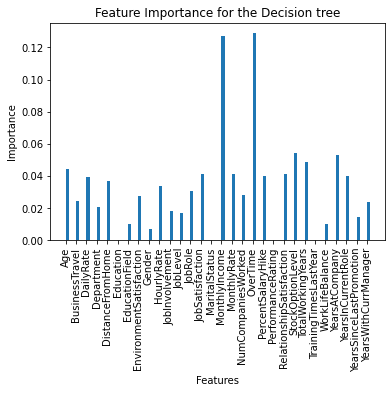

In [22]:
get_feature_importance(dt_classifier, X_train)

## K Fold Cross Validation

In [23]:
def cross_validation(model, X, y, my_cv = 5):
  scores = cross_validate(model, X, y, cv=my_cv, scoring=('accuracy','precision','recall','f1'))
  print(scores)
  print("Accuracy: ", np.mean(scores['test_accuracy']))
  print("Precision: ", np.mean(scores['test_precision']))
  print("Recall: ", np.mean(scores['test_recall']))
  print("F1 Score: ", np.mean(scores['test_f1']))

### Performing K Fold Cross Validation with above Hyperparameters

In [24]:
cross_validation(DecisionTreeClassifier(**best_params_raw), X, Y, 5)

{'fit_time': array([0.01040268, 0.00973535, 0.0125351 , 0.00970864, 0.01003051]), 'score_time': array([0.00658083, 0.00502658, 0.00554347, 0.00559402, 0.00511265]), 'test_accuracy': array([0.87044534, 0.88032454, 0.89249493, 0.87221095, 0.84787018]), 'test_precision': array([0.83032491, 0.84057971, 0.83680556, 0.8019802 , 0.82264151]), 'test_recall': array([0.93117409, 0.93927126, 0.9757085 , 0.98780488, 0.88617886]), 'test_f1': array([0.8778626 , 0.88718929, 0.90093458, 0.8852459 , 0.85322896])}
Accuracy:  0.8726691905297649
Precision:  0.826466376580308
Recall:  0.9440275171982488
F1 Score:  0.8808922663718939
